Import the numpy and pandas packages

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

Data inspection

In [270]:
fare = pd.read_excel('flight_fare.xlsx')
fare.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [271]:
fare.shape

(10683, 11)

In [272]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Checking null values

In [273]:
fare.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Removing null values and unwanted columns

In [274]:
fare['Route'] = fare['Route'].fillna(fare['Route'].mode()[0])
fare['Total_Stops'] = fare['Total_Stops'].fillna(fare['Total_Stops'].mode()[0])

fare=fare.drop(['Date_of_Journey','Route','Arrival_Time','Dep_Time','Additional_Info'],axis=1)

In [275]:
fare.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [276]:
fare.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302


In [277]:
fare['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

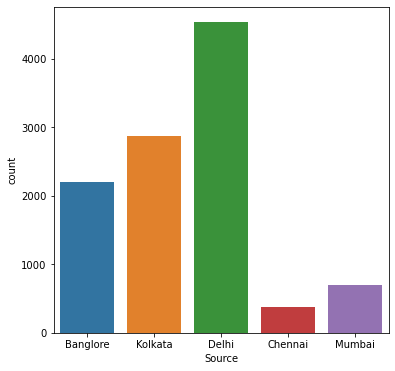

In [278]:
plt.figure(figsize=(6,6))
sns.countplot(fare['Source'])
plt.show()

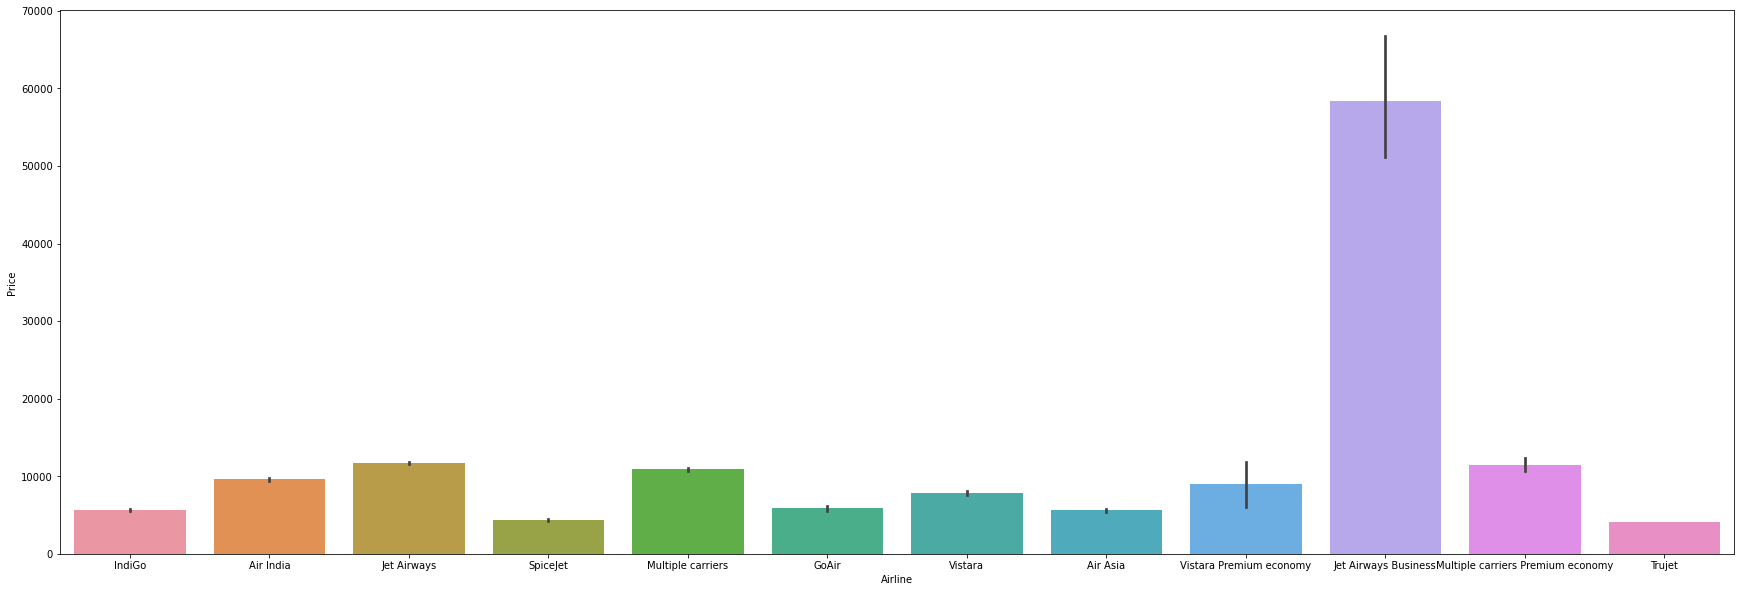

In [279]:
plt.figure(figsize=(30,10))
sns.barplot(x="Airline",y='Price', data=fare)
plt.show()

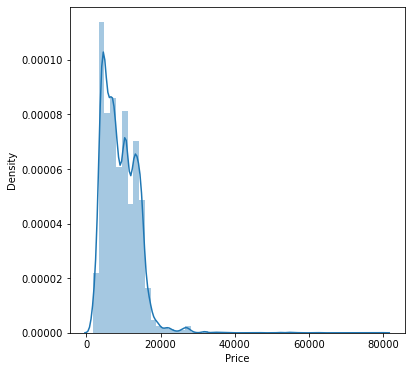

In [280]:
plt.figure(figsize=(6,6))
sns.distplot(fare['Price'])
plt.show()

In [281]:
fare['Price'].skew()

1.8125523782189141

In [282]:
fare['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

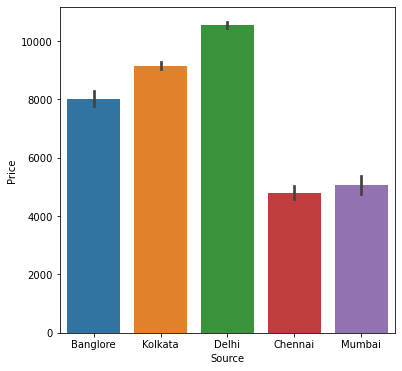

In [283]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y='Price', data=fare)
plt.show()

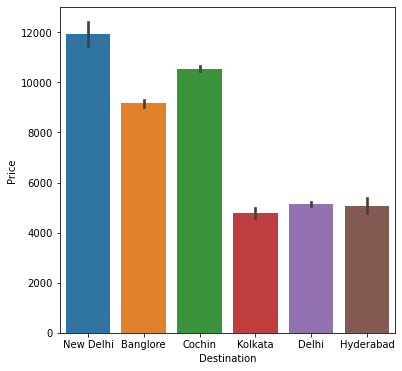

In [284]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y='Price', data=fare)
plt.show()

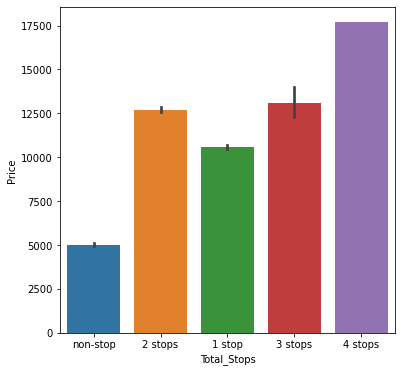

In [285]:
plt.figure(figsize=(6,6))
sns.barplot(x="Total_Stops",y='Price', data=fare)
plt.show()

In [286]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(fare["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [287]:
# Adding duration_hours and duration_mins list to train_data dataframe

fare["Duration_hours"] = duration_hours
fare["Duration_mins"] = duration_mins

fare=fare.drop(['Duration'],axis=1)

In [288]:
fare.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

In [289]:
# As Source, Airline, Destination is Nominal Categorical data we will perform OneHotEncoding

Airline = fare[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)


Source = fare[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)


Destination = fare[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

In [290]:
# Concatenate dataframe --> fare + Airline + Source + Destination

fare = pd.concat([fare, Airline, Source, Destination], axis = 1)

In [291]:
fare=fare.drop(['Airline','Source','Destination'],axis=1)

In [292]:
fare.head(5)

,Total_Stops,Price,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Finding co-relation

<AxesSubplot:>

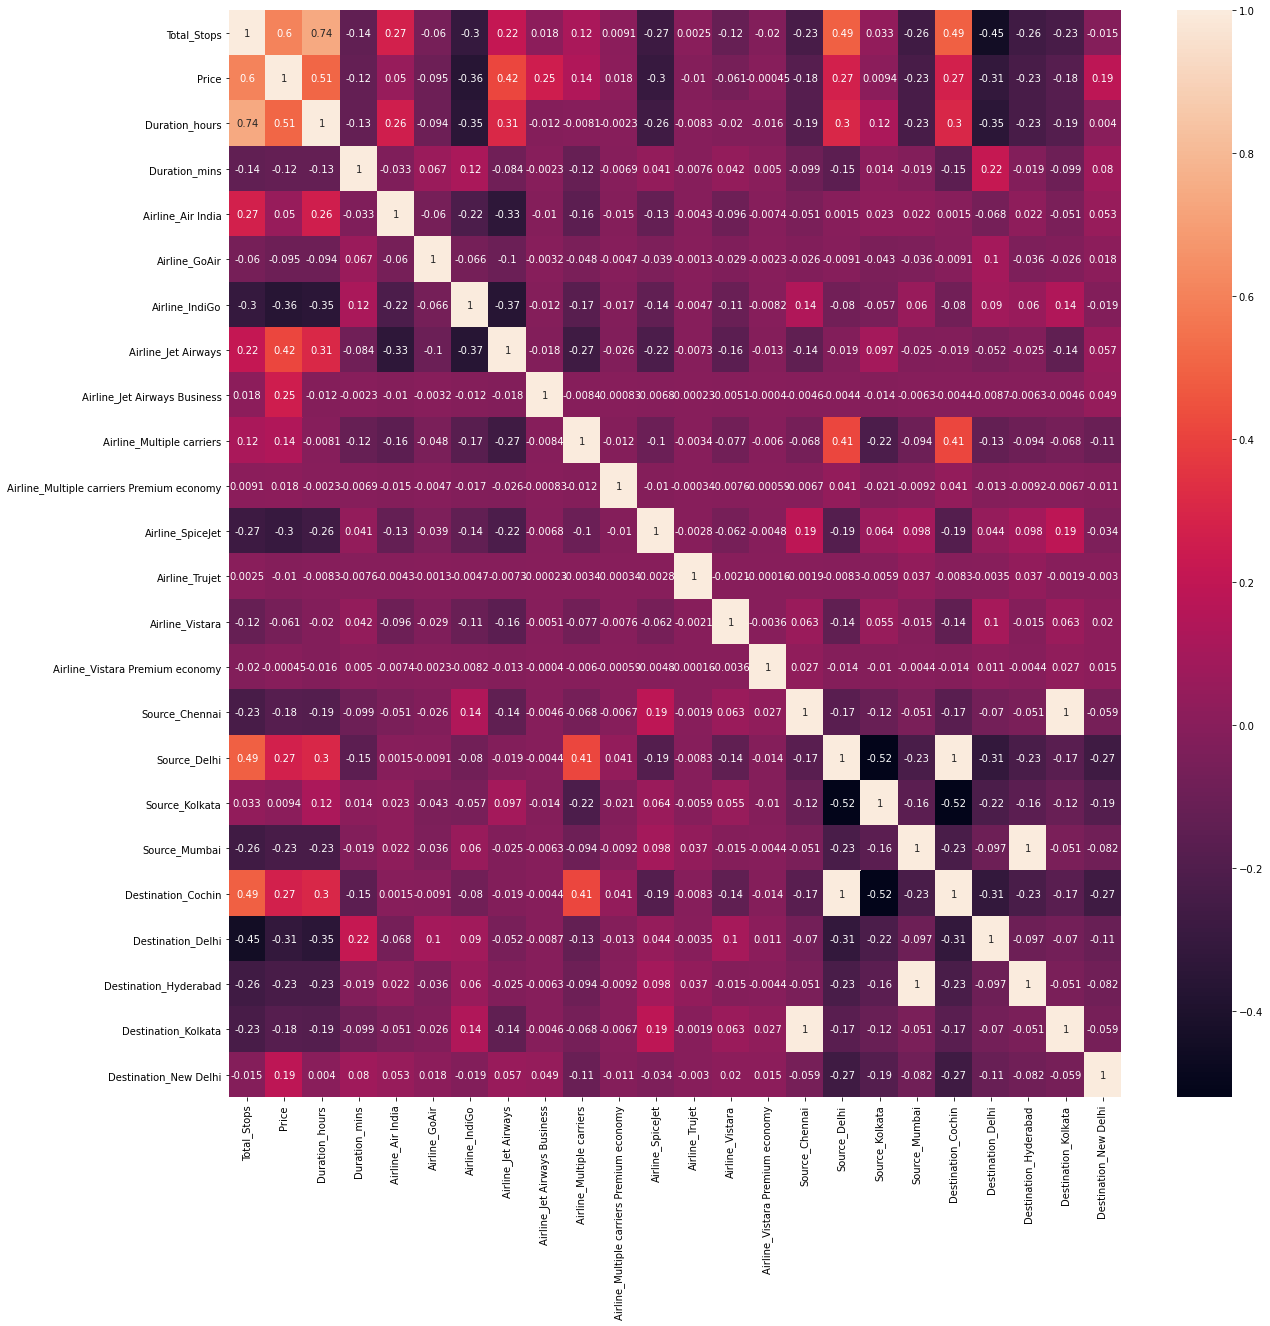

In [293]:
plt.figure(figsize=(20,20))
sns.heatmap(fare.corr(),annot=True)

Spliting data by train_test_split

In [294]:
x=fare.drop('Price',axis=1)
y=fare['Price']

Scaling Data

In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [296]:
# Scaling Data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [297]:
# Model Training and Testing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [298]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

In [299]:
# Testing with linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5423843075770578

In [300]:
# Testing with KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.5886253513852242

In [301]:
# Testing with DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.4649580275654245

In [302]:
# Testing with RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.4844339994587764

In [303]:
# Testing with AdaBoostRegressor
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.4686684768613292

In [304]:
# Testing with GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.5816420132980991

In [305]:
# Model Results
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.542384
1,KNeighbors,0.588625
2,Decision Tree,0.464958
3,RandomForest,0.484434
4,AdaBoost,0.468668
5,GradientBoosting,0.581642


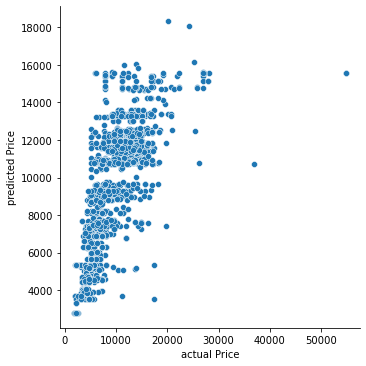

In [309]:
prediction= pd.DataFrame({'actual Price': y_test, 'predicted Price': y_pred})
sns.relplot(data=prediction, x='actual Price', y='predicted Price')

In [307]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1920.456655727957
MSE: 8858214.296835769
RMSE: 2976.275238756619
